<a href="https://colab.research.google.com/github/ndsoi/MachineLearning/blob/main/MDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

对比：调用MDS模型调用模型<br>


```
# 此内容为代码格式
X_r,y=data
mds=manifold.MDS(n_components=2)
X_r=mds.fit_transform(X) #原始数据集转换到二维
```






/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


stress(n_components=4) : 12.660815763124724


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


stress(n_components=3) : 16.946293947797564


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


stress(n_components=2) : 131.2816443502927
stress(n_components=1) : 21811.884237995982


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


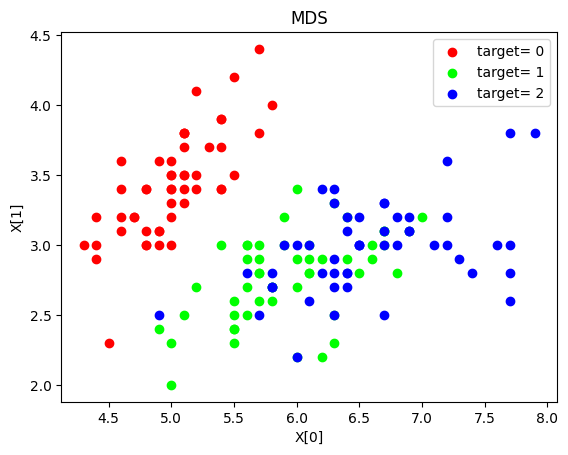

In [19]:
"""
    MDS降维
"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn import   datasets,manifold

def load_data():
    '''
    加载用于降维的数据
    :return: 一个元组，依次为训练样本集和样本集的标记
    '''
    iris=datasets.load_iris()# 使用 scikit-learn 自带的 iris 数据集
    return  iris.data,iris.target

def test_MDS(*data):
    '''
    测试 MDS 的用法
    :param data: 可变参数。它是一个元组，这里要求其元素依次为：训练样本集、训练样本的标记
    '''
    X,y=data
    for n in [4,3,2,1]: # 依次考察降维目标为 4维、3维、2维、1维
        mds=manifold.MDS(n_components=n)
        mds.fit(X)
        print('stress(n_components=%d) : %s'% (n, str(mds.stress_)))

def plot_MDS(*data):
    '''
    绘制经过 使用 MDS 降维到二维之后的样本点
    :param data: 可变参数。它是一个元组，这里要求其元素依次为：训练样本集、训练样本的标记
    '''
    X_r,y=data
    # mds=manifold.MDS(n_components=2)
    # X_r=mds.fit_transform(X) #原始数据集转换到二维
    ### 绘制二维图形
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    colors=((1,0,0),(0,1,0),(0,0,1),(0.5,0.5,0),(0,0.5,0.5),(0.5,0,0.5),
        (0.4,0.6,0),(0.6,0.4,0),(0,0.6,0.4),(0.5,0.3,0.2),)# 颜色集合，不同标记的样本染不同的颜色
    for label ,color in zip( np.unique(y),colors):
        position=y==label
        ax.scatter(X_r[position,0],X_r[position,1],label="target= %d"%label,color=color)
    ax.set_xlabel("X[0]")
    ax.set_ylabel("X[1]")
    ax.legend(loc="best")
    ax.set_title("MDS")
    plt.show()

if __name__=='__main__':
    X,y=load_data() # 产生用于降维的数据集
    test_MDS(X,y)   # 调用 test_MDS
    plot_MDS(X,y)   # 调用 plot_MDS


In [3]:
# 导入必要的库
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 加载鸢尾花数据集
iris = datasets.load_iris()
X = iris.data
y = iris.target


MDS <br>
$$b_{i,j} = -\frac{1}{2}(dist_{i,j}^2-dist_{i.}^2-dist_{j.}^2+dist_{..}^2)$$


原先的维度(150, 4)
距离矩阵D=[[ 0.    0.29  0.26 ... 19.89 21.63 17.14]
 [ 0.29  0.    0.09 ... 20.24 22.26 17.25]
 [ 0.26  0.09  0.   ... 21.73 23.51 18.48]
 ...
 [19.89 20.24 21.73 ...  0.    0.38  0.41]
 [21.63 22.26 23.51 ...  0.38  0.    0.59]
 [17.14 17.25 18.48 ...  0.41  0.59  0.  ]]


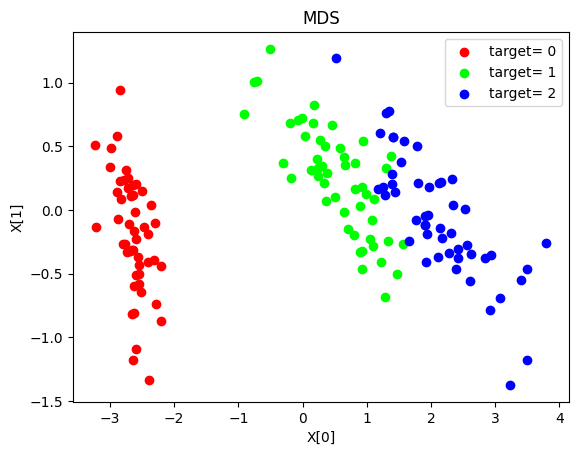

In [28]:
## 将4维数据压缩到2维
# 做原维度内积得到D
import numpy as np
print(f'原先的维度{X.shape}')
m = X.shape[0] # m个样本
D = np.zeros((m,m))
D_i = np.zeros((m,))
D_j = np.zeros((m,))
B = np.zeros((m,m))
def L2(x1,x2):
  n = x1.shape[0]
  sum = 0
  for i in range(n):
    sum += np.power((x1[i]-x2[i]),2)
  return sum

## 计算distij
for i in range(m):
  for j in range(m):
    ## 样本xi和xj的距离计算，直接用L2范数
    D[i,j] = L2(X[i],X[j])  # 或者直接用np.linalg.norm(X[i]-X[j],ord=2)

print(f'距离矩阵D={D}')


const = 0
for i in range(m):
  sum = 0
  for j in range(m):
    sum += D[i,j]
  D_i[i] = sum/m
for j in range(m):
  sum = 0
  for i in range(m):
    sum += D[i,j]
    const += D[i,j]
  D_j[j] = sum/m

const /= m*m

#求B矩阵
for i in range(m):
  for j in range(m):
    B[i,j] = -0.5*(D[i,j]-D_i[i]-D_j[j]+const)
# B进行特征值分解
eigenvalues,eigenvectors = np.linalg.eig(B)
d = 2
index = np.argsort(-eigenvalues)[:d] # 默认从小到大排，取个负号
# diag_values = np.sqrt(np.diag(-np.sort(-eigenvalues)[:d]))  # 与下行代码等价
diag_values = np.sqrt(np.diag(eigenvalues)[index])
V = eigenvectors[:,index]

Z = np.dot(V,diag_values)

## 绘制降维效果
plot_MDS(Z,y)